In [ ]:
!apt-get install -y ffmpeg
!pip install pydub

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Importamos las librerías
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import gc
from google.colab import drive
from pydub import AudioSegment
from pydub.utils import mediainfo
import subprocess
import cv2

In [ ]:
# Montar el Drive
drive.mount('/content/drive')

# Definir rutas de las carpetas en Google Drive
ruta_carpeta_IA = '/content/drive/MyDrive/Proyecto SIC/Voces IA'
ruta_carpeta_reales = '/content/drive/MyDrive/Proyecto SIC/Voces reales'
ruta_carpeta_combinadas = '/content/drive/MyDrive/Proyecto SIC/Voces combinadas/clips'

Mounted at /content/drive


In [ ]:
# Función para convertir un archivo de audio en espectrograma y guardarlo como imagen
def convertir_y_guardar_espectrograma(archivo_audio, nombre_salida, carpeta_espectro):
    ruta_imagen = os.path.join(carpeta_espectro, nombre_salida)
    if os.path.exists(ruta_imagen):  # Verificar si la imagen ya existe
        return ruta_imagen

    y, sr = librosa.load(archivo_audio, sr=None, duration=60)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)
    S_db = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(5, 2))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(ruta_imagen, format='png', bbox_inches='tight', pad_inches=0)
    plt.close()
    gc.collect()

    return ruta_imagen

In [ ]:
# Función para procesar audios y generar un DataFrame
def obtener_data_audio(ruta_carpeta, ruta_salida, etiqueta):
    nombres_archivos = []
    duraciones = []
    frecuencias_muestreo = []
    rutas_imagenes_espectrograma = []
    etiquetas = []

    if not os.path.exists(ruta_salida):
        os.makedirs(ruta_salida)

    archivos_audio = [f for f in os.listdir(ruta_carpeta) if f.endswith(('.mp3', '.wav', '.flac'))]

    for archivo in archivos_audio:
        ruta_archivo = os.path.join(ruta_carpeta, archivo)
        if archivo.endswith('.flac'):
            ruta_archivo = convertir_flac_a_wav(ruta_archivo)
            if not ruta_archivo:
                continue

        y, sr = librosa.load(ruta_archivo, sr=None, duration=60)
        nombres_archivos.append(archivo)
        duraciones.append(librosa.get_duration(y=y, sr=sr))
        frecuencias_muestreo.append(sr)

        nombre_salida_espectrograma = archivo.replace('.mp3', '.png').replace('.wav', '.png').replace('.flac', '.png')
        ruta_imagen = convertir_y_guardar_espectrograma(ruta_archivo, nombre_salida_espectrograma, ruta_salida)
        rutas_imagenes_espectrograma.append(ruta_imagen)
        etiquetas.append(etiqueta)

    return pd.DataFrame({
        'Nombre del archivo': nombres_archivos,
        'Duración (segundos)': duraciones,
        'Frecuencia de muestreo': frecuencias_muestreo,
        'Ruta espectrograma': rutas_imagenes_espectrograma,
        'Etiqueta': etiquetas
    })

In [ ]:
#vamos a crear todas las carpetas donde se van a guardar los espectogramas
carpeta_salida_espectrogramas_IA = '/content/drive/MyDrive/Proyecto SIC/espectrogramas_IA/'

# Crear la carpeta para guardar los espectrogramas si no existe
if not os.path.exists(carpeta_salida_espectrogramas_IA):
    os.makedirs(carpeta_salida_espectrogramas_IA)

carpeta_salida_espectrogramas_reales = '/content/drive/MyDrive/Proyecto SIC/espectrogramas_reales/'

# Crear la carpeta para guardar los espectrogramas si no existe
if not os.path.exists(carpeta_salida_espectrogramas_reales):
    os.makedirs(carpeta_salida_espectrogramas_reales)


In [ ]:
def convertir_flac_a_wav(archivo_flac):
    # Comprobar si el archivo existe y es un archivo FLAC
    if not archivo_flac.endswith('.flac'):
        print(f"El archivo {archivo_flac} no es un archivo FLAC.")
        return None

    # Crear la ruta del archivo WAV
    archivo_wav = archivo_flac.replace('.flac', '.wav')

    # Intentar convertir el archivo FLAC a WAV usando ffmpeg, con sobrescritura automática
    try:
        subprocess.run(['ffmpeg', '-y', '-i', archivo_flac, archivo_wav], check=True)  # Se agregó el parámetro -y
        print(f"Conversión exitosa: {archivo_flac} -> {archivo_wav}")
        return archivo_wav

    except subprocess.CalledProcessError as e:
        print(f"Error al convertir {archivo_flac} con ffmpeg: {e}")
        return None  # Devuelve None si la conversión falla

In [ ]:
df_IA = obtener_data_audio(ruta_carpeta_IA , carpeta_salida_espectrogramas_IA, 0 )

#mostramos el df_IA
df_IA.head()

,Nombre del archivo,Duración (segundos),Frecuencia de muestreo,Ruta espectrograma,Etiqueta
0,Ibai's Voice(2).wav,53.935000,24000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,0
1,Ibai's Voice(3).wav,13.260000,24000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,0
2,Ibai's Voice(4).wav,12.460000,24000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,0
3,Ibai's Voice(5).wav,14.885042,24000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,0
4,Ibai's Voice(6).wav,12.060000,24000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,0


In [ ]:
#ahora vamos con las voces reales
df_reales = obtener_data_audio(ruta_carpeta_reales, carpeta_salida_espectrogramas_reales, 1)

#mostramos el df_reales
df_reales.head()

,Nombre del archivo,Duración (segundos),Frecuencia de muestreo,Ruta espectrograma,Etiqueta
0,Ibai_real.wav,27.167347,44100,/content/drive/MyDrive/Proyecto SIC/espectrogr...,1
1,clip_2.wav,10.000000,48000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,1
2,clip_1.wav,10.000000,48000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,1
3,clip_3.wav,10.000000,48000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,1
4,clip_4.wav,10.000000,48000,/content/drive/MyDrive/Proyecto SIC/espectrogr...,1


In [ ]:
#por si acaso instalamos tenserflow
!pip install tensorflow

In [ ]:
#empezamos a armar la red CNN
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
def cargar_espectrogramas(df):
    # Tamaño de las imágenes de espectrograma
    img_width, img_height = 128, 128

    # Inicializar listas para las imágenes y las etiquetas
    X = []
    y = []

    for index, row in df.iterrows():
        img_path = row['Ruta espectrograma']
        etiqueta = row['Etiqueta']

        # Cargar la imagen y redimensionarla
        img = load_img(img_path, target_size=(img_width, img_height), color_mode="grayscale")
        img_array = img_to_array(img)

        # vamos a ver la etiqueta
        #print("Etiqueta de la imagen: " , etiqueta)
        # vamos a ver la imagen
        # antes de normalizar
        #plt.imshow(img_array.squeeze(), cmap='gray')
        #plt.title(f'Espectrograma - Etiqueta: {etiqueta}')
        #plt.axis('off')
        #plt.show()

        # Normalizar los valores de la imagen entre 0 y 1
        img_array /= 255.0

        #despues de normalizar
        #plt.imshow(img_array.squeeze(), cmap='gray')
        #plt.axis('off')
        #plt.show()
        #print("---------------------------------------")

        X.append(img_array)
        y.append(etiqueta)

    return np.array(X), np.array(y)

In [ ]:
# las rutas de los archivos
rutas_espectrogramas_IA = df_IA["Ruta espectrograma"].values
rutas_espectrogramas_reales = df_reales["Ruta espectrograma"].values

# Unir las rutas de espectrogramas IA y reales
rutas_espectrogramas = np.concatenate((rutas_espectrogramas_IA, rutas_espectrogramas_reales), axis=0)

# Cargar los espectrogramas como antes
X_IA, y_IA = cargar_espectrogramas(df_IA)
X_reales, y_reales = cargar_espectrogramas(df_reales)

# Unir los datasets IA y reales
X = np.concatenate((X_IA, X_reales), axis=0)
y = np.concatenate((y_IA, y_reales), axis=0)

# Convertir etiquetas a formato categórico (one-hot encoding)
y = to_categorical(y, num_classes=2)

# Dividir en conjuntos de entrenamiento y prueba, manteniendo las rutas de los archivos en X_test
X_train, X_test, y_train, y_test, rutas_train, rutas_test = train_test_split(
    X, y, rutas_espectrogramas, test_size=0.2, random_state=42
)

In [ ]:
# Crear la arquitectura del modelo CNN
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Tercera capa convolucional
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanamiento
model.add(Flatten())

# Capa densa completamente conectada
model.add(Dense(128, activation='relu'))

# Capa de salida (2 clases: IA o Real)
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5851 - loss: 0.7063 - val_accuracy: 0.8158 - val_loss: 0.5086
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8857 - loss: 0.4175 - val_accuracy: 0.9684 - val_loss: 0.1502
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9563 - loss: 0.1472 - val_accuracy: 0.9789 - val_loss: 0.1005
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 40s 967ms/step - accuracy: 0.9832 - loss: 0.0615 - val_accuracy: 0.9842 - val_loss: 0.0687
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 959ms/step - accuracy: 0.9630 - loss: 0.1047 - val_accuracy: 0.9737 - val_loss: 0.0617


In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc * 100:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.9646 - loss: 0.0990
Precisión en el conjunto de prueba: 97.37%


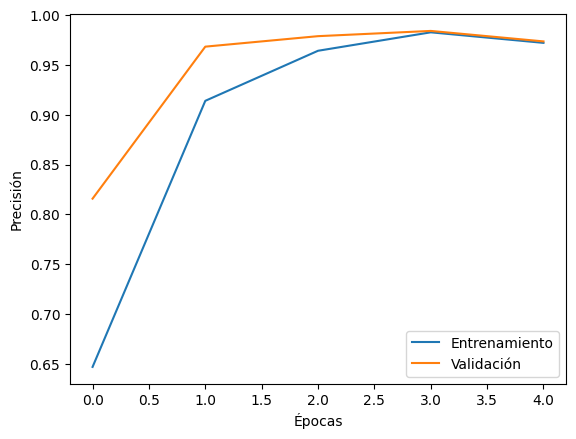

In [ ]:
# Gráfica de la precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()


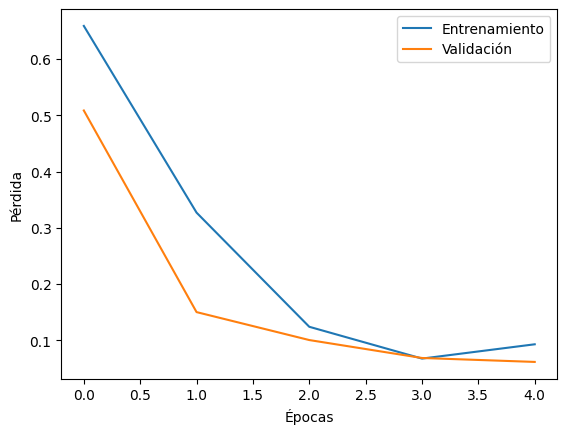

In [ ]:
# Gráfica de la pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Realizar predicciones con el conjunto de prueba
predicciones = model.predict(X_test)

# Convertir las predicciones de probabilidades a etiquetas (0 o 1)
predicciones_clases = np.argmax(predicciones, axis=1)

# Mostrar las primeras 50 predicciones con rutas y niveles de confianza
for i in range(100):
    ruta_archivo = rutas_test[i]
    prediccion = predicciones_clases[i]
    confianza = predicciones[i][prediccion] * 100

    # Mostrar ubicación, predicción en términos de clase y confianza
    print(f"Ubicación en Drive: {ruta_archivo}")
    print(f"Predicción del modelo: Clase {prediccion} ({confianza:.2f}% de confianza)\n")

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {test_acc * 100:.2f}%")




6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step
Ubicación en Drive: /content/drive/MyDrive/Proyecto SIC/espectrogramas_IA/clip_b37e7deb-4b86-4a3a-8ce3-c2b156766387.png
Predicción del modelo: Clase 1 (97.82% de confianza)

Ubicación en Drive: /content/drive/MyDrive/Proyecto SIC/espectrogramas_IA/clip_26.png
Predicción del modelo: Clase 0 (98.68% de confianza)

Ubicación en Drive: /content/drive/MyDrive/Proyecto SIC/espectrogramas_reales/clip_a3338b0c-7e60-412e-a517-57990c475891.png
Predicción del modelo: Clase 1 (87.24% de confianza)

Ubicación en Drive: /content/drive/MyDrive/Proyecto SIC/espectrogramas_reales/clip_51.png
Predicción del modelo: Clase 1 (93.35% de confianza)

Ubicación en Drive: /content/drive/MyDrive/Proyecto SIC/espectrogramas_IA/clip_72.png
Predicción del modelo: Clase 0 (96.90% de confianza)

Ubicación en Drive: /content/drive/MyDrive/Proyecto SIC/espectrogramas_reales/clip_170.png
Predicción del modelo: Clase 1 (98.55% de confianza)

Ubicación en Drive: /content/drive/MyDri

In [ ]:
from tensorflow.keras.models import load_model

# Ruta donde guardar el modelo en tu Drive
ruta_modelo = '/content/drive/MyDrive/Proyecto SIC/modelo_CNN_DetectVoice_00.h5'

# Guardar el modelo en formato HDF5
model.save(ruta_modelo)
print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: /content/drive/MyDrive/Proyecto SIC/modelo_CNN_DetectVoice_00.h5


In [ ]:
def extract_features(file_path, target_shape=(128, 128, 1)):

    # Cargar el audio (máximo 60 segundos)
    y, sr = librosa.load(file_path, sr=None, duration=120)

    # Generar el espectrograma Mel con menor resolución
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64)

    # Convertir el espectrograma a escala logarítmica
    S_db = librosa.power_to_db(S, ref=np.max)

    # Crear una imagen del espectrograma usando matplotlib
    plt.figure(figsize=(5, 2))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', cmap='gray_r')

    # Eliminar los ejes y el marco
    plt.axis('off')
    plt.tight_layout()

    # Guardar la imagen en un búfer de memoria
    buffer_path = "temp_spectrogram.png"
    plt.savefig(buffer_path, bbox_inches='tight', pad_inches=0)
    plt.close()

    # Cargar la imagen como un arreglo de numpy
    img = cv2.imread(buffer_path, cv2.IMREAD_GRAYSCALE)

    # Redimensionar la imagen a la forma que espera el modelo (128x128)
    spectrogram_resized = cv2.resize(img, (target_shape[1], target_shape[0]))

    # Mostrar la imagen del espectrograma redimensionada
    plt.imshow(spectrogram_resized, cmap='gray')
    plt.show()

    # Eliminar el archivo temporal
    os.remove(buffer_path)

    # Normalizar la imagen a valores entre 0 y 1
    spectrogram_normalized = spectrogram_resized / 255.0

    # Agregar una dimensión adicional para el canal (grayscale)
    return spectrogram_normalized[..., np.newaxis]


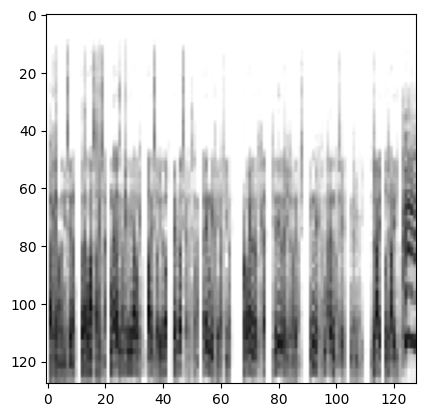

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicción:  Real
Clase:  [1]
Confianza de 99.92220401763916%


In [ ]:
# Ruta al archivo de audio
audio_path = '/content/videoplayback.mp3.mp3'

# Llamar a la función y extraer características
audio_features = extract_features(audio_path, target_shape=(128, 128,1))

# Asegurarse de que las características se hayan extraído correctamente
if audio_features is not None:
    # Ajustar la forma de audio_features para que tenga el formato esperado por el modelo
    audio_features = np.expand_dims(audio_features, axis=0)  # Agrega la dimensión del lote, forma final (1, 128, 128, 1)

    # Realizar la predicción
    predicciones = model.predict(audio_features)

    # Convertir las predicciones de probabilidades a etiquetas (0 o 1)
    predicciones_clases = np.argmax(predicciones, axis=1)

    # Interpretar la predicción
    if predicciones_clases[0] == 0:
        valor = "IA"
    else:
        valor = "Real"

    print("Predicción: ", valor)
    print("Clase: ", predicciones_clases)
    print("Confianza de " + str(predicciones[0][predicciones_clases[0]] * 100) + "%")
else:
    print("Error en la extracción de características; no se realizó la predicción.")